# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mahesana
Processing Record 3 of Set 1 | torrington
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | sorland
Processing Record 8 of Set 1 | sola
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | shimanovsk
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | belmonte
Processing Record 14 of Set 1 | sompeta
Processing Record 15 of Set 1 | burica
City not found. Skipping...
Processing Record 16 of Set 1 | dibaya
City not found. Skipping...
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | rotifunk
Processing Rec

Processing Record 30 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 31 of Set 4 | hobyo
Processing Record 32 of Set 4 | sao felix do xingu
Processing Record 33 of Set 4 | keti bandar
Processing Record 34 of Set 4 | loiza
Processing Record 35 of Set 4 | victoria
Processing Record 36 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 4 | comodoro rivadavia
Processing Record 38 of Set 4 | ulkan
Processing Record 39 of Set 4 | kiruna
Processing Record 40 of Set 4 | tabou
Processing Record 41 of Set 4 | tonantins
Processing Record 42 of Set 4 | meadow lake
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | mocorito
Processing Record 45 of Set 4 | mercedes
Processing Record 46 of Set 4 | bajil
Processing Record 47 of Set 4 | kondinskoye
Processing Record 48 of Set 4 | broken hill
Processing Record 49 of Set 4 | zaterechnyy
Processing Record 0 of Set 5 | seymchan
Processing Record 1 of Set 5 | amapa
Processi

Processing Record 24 of Set 8 | dumai
Processing Record 25 of Set 8 | cabo san lucas
Processing Record 26 of Set 8 | la asuncion
Processing Record 27 of Set 8 | sangar
Processing Record 28 of Set 8 | abbeville
Processing Record 29 of Set 8 | opuwo
Processing Record 30 of Set 8 | khatanga
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | hihifo
City not found. Skipping...
Processing Record 33 of Set 8 | roald
Processing Record 34 of Set 8 | ambilobe
Processing Record 35 of Set 8 | cap malheureux
Processing Record 36 of Set 8 | longyearbyen
Processing Record 37 of Set 8 | sinjah
City not found. Skipping...
Processing Record 38 of Set 8 | vacaville
Processing Record 39 of Set 8 | areia branca
Processing Record 40 of Set 8 | moree
Processing Record 41 of Set 8 | amos
Processing Record 42 of Set 8 | fairbanks
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | othonoi
City not found. Skipping...
Processing Record 45 of Set 8 | wajir
Pro

Processing Record 9 of Set 12 | nokaneng
Processing Record 10 of Set 12 | la palma
Processing Record 11 of Set 12 | beaverlodge
Processing Record 12 of Set 12 | fuxin
Processing Record 13 of Set 12 | dalen
Processing Record 14 of Set 12 | ribeira brava
Processing Record 15 of Set 12 | los andes
Processing Record 16 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 17 of Set 12 | baiao
Processing Record 18 of Set 12 | chapais
Processing Record 19 of Set 12 | amahai
Processing Record 20 of Set 12 | hofn
Processing Record 21 of Set 12 | manzhouli
Processing Record 22 of Set 12 | sinjhoro
Processing Record 23 of Set 12 | maua
Processing Record 24 of Set 12 | imatra
Processing Record 25 of Set 12 | romny
Processing Record 26 of Set 12 | isangel
Processing Record 27 of Set 12 | tolaga bay
Processing Record 28 of Set 12 | koyilandi
City not found. Skipping...
Processing Record 29 of Set 12 | prainha
Processing Record 30 of Set 12 | hamilton
Processing Record 31 of Set 12 | in

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.66,75,38,19.48,PF,1675970251
1,mahesana,23.6000,72.4000,67.66,32,0,5.44,IN,1675970252
2,torrington,41.8007,-73.1212,45.12,71,100,5.01,US,1675970165
3,barrow,71.2906,-156.7887,-18.38,76,100,6.91,US,1675970255
4,vaini,-21.2000,-175.2000,77.16,94,75,1.14,TO,1675970257


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.66,75,38,19.48,PF,1675970251
1,mahesana,23.6000,72.4000,67.66,32,0,5.44,IN,1675970252
2,torrington,41.8007,-73.1212,45.12,71,100,5.01,US,1675970165
3,barrow,71.2906,-156.7887,-18.38,76,100,6.91,US,1675970255
4,vaini,-21.2000,-175.2000,77.16,94,75,1.14,TO,1675970257


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

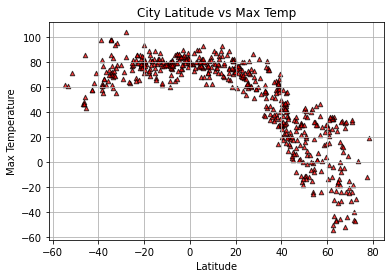

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

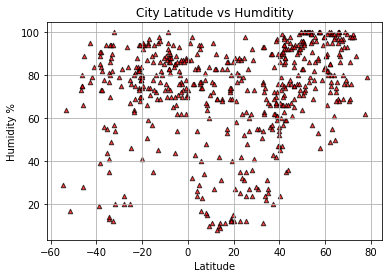

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Humditity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

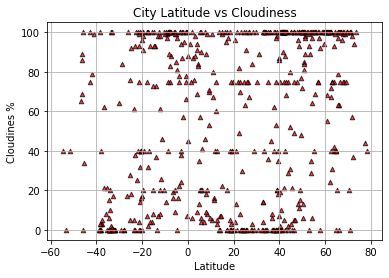

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudines %')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot

#### Latitude vs. Wind Speed Plot

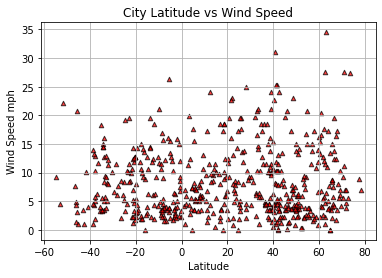

In [12]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


y = -0.79x + 66.07
The r-squared is: 0.5850912002967377


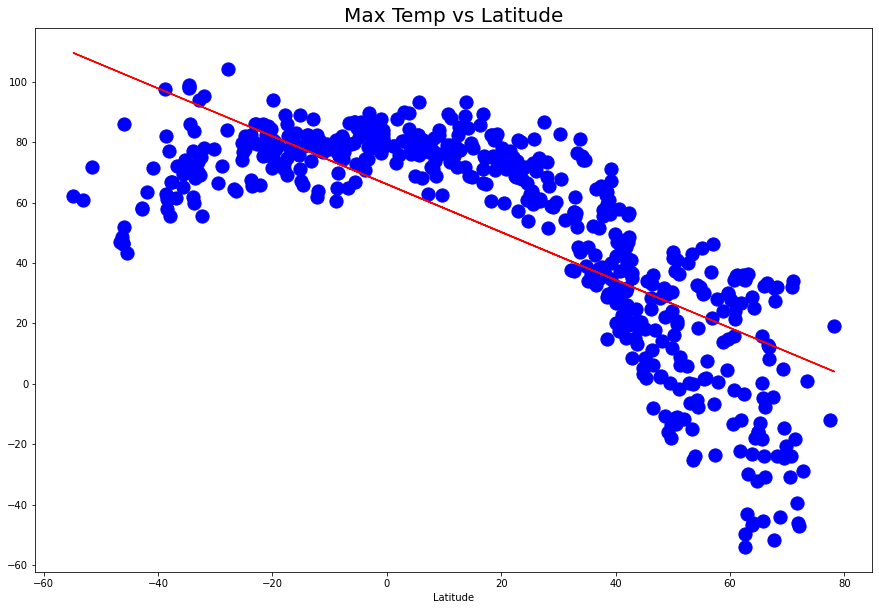

In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)



# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Max Temp vs Latitude',fontsize =20)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('',fontsize =10)


print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mahesana,23.6000,72.4000,67.66,32,0,5.44,IN,1675970252
2,torrington,41.8007,-73.1212,45.12,71,100,5.01,US,1675970165
3,barrow,71.2906,-156.7887,-18.38,76,100,6.91,US,1675970255
5,sorland,67.6670,12.6934,31.86,69,100,16.40,NO,1675970258
7,albany,42.6001,-73.9662,41.05,88,100,1.99,US,1675970121


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df = pd.DataFrame(southern_hemi)


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.66,75,38,19.48,PF,1675970251
4,vaini,-21.2000,-175.2000,77.16,94,75,1.14,TO,1675970257
6,sola,-13.8833,167.5500,82.31,72,73,14.45,VU,1675970259
9,punta arenas,-53.1500,-70.9167,60.82,64,0,4.61,CL,1675970053
10,hermanus,-34.4187,19.2345,71.80,77,6,14.97,ZA,1675970262


###  Temperature vs. Latitude Linear Regression Plot

y = -1.52x + 97.58
The r-squared is: 0.7246387711457144


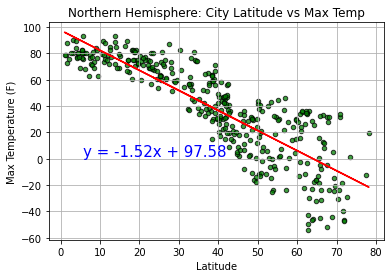

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

y = 0.33x + 82.69
The r-squared is: 0.19398969421922396


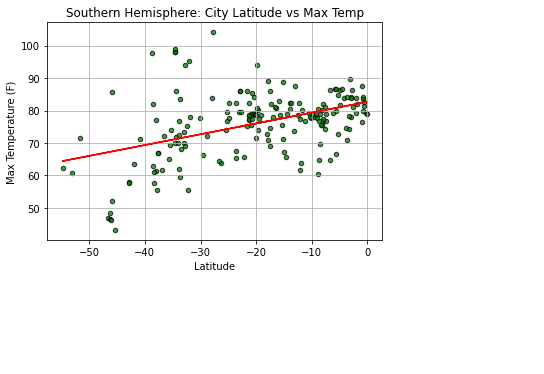

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a  moderate relationship between Max Temp and Latitude of r value of 0.75. The Southern Hemisphere, is still has a weak relationship between Max Temp and Latitude value of r value of 0.21

### Humidity vs. Latitude Linear Regression Plot

y = 0.55x + 50.04
The r-squared is: 0.2027747977723765


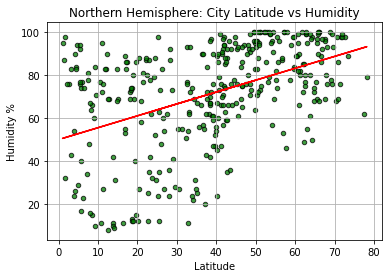

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()

y = 0.4x + 82.38
The r-squared is: 0.0803122053147143


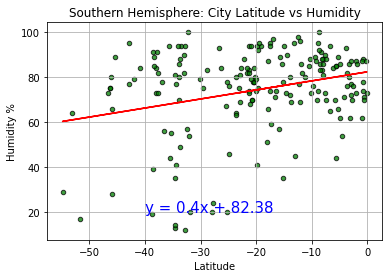

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,20), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** none the relationship is weak between the Latitude and Humidity based on the determined r-value for both southern and northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.58x + 38.3
The r-squared is: 0.0812823983307958


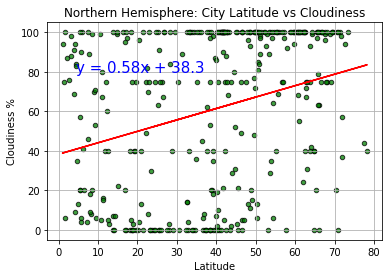

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(4.5,80), fontsize=15, color='b')
plt.show()

y = 1.13x + 74.42
The r-squared is: 0.13995100766721502


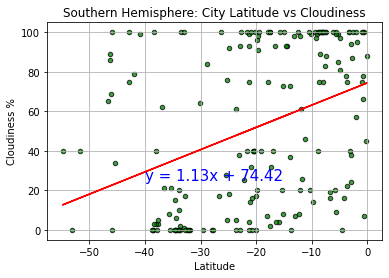

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,25), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship:** both graphs show no linear relationship between Latitude and cloudines

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x + 8.14
The r-squared is: 0.0005377444857396344


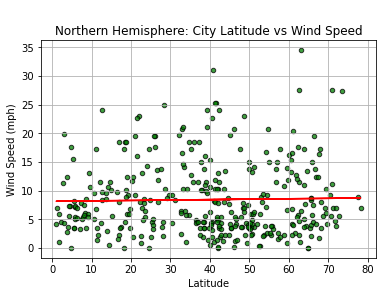

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,40), fontsize=15, color='b')
plt.show()

y = -0.02x + 7.52
The r-squared is: 0.002196009342764737


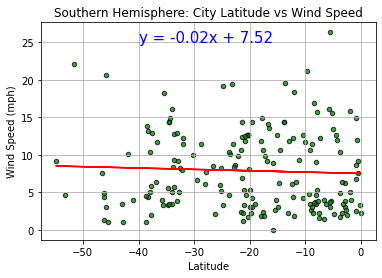

In [23]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(-40,25), fontsize=15, color='b')
plt.show()

**Discussion about the linear relationship: No Relationship - The linear regresion shows a much lower correlation than it appears. There is no linear relationship between Latitude and Wind Speed. Based on the the r-value which are low.